In [1]:
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np

%matplotlib inline

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [3]:
# matplotlib doesn't have a function for drawing text with
# different colors, let's implement it
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')

In [4]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [5]:
X = ['Backend', 'Front', 'Full stack', 'Desktop', 'Mobile']
Y = [75, 60, 65, 60, 80]
Z = [100, 90, 100, 80, 120]

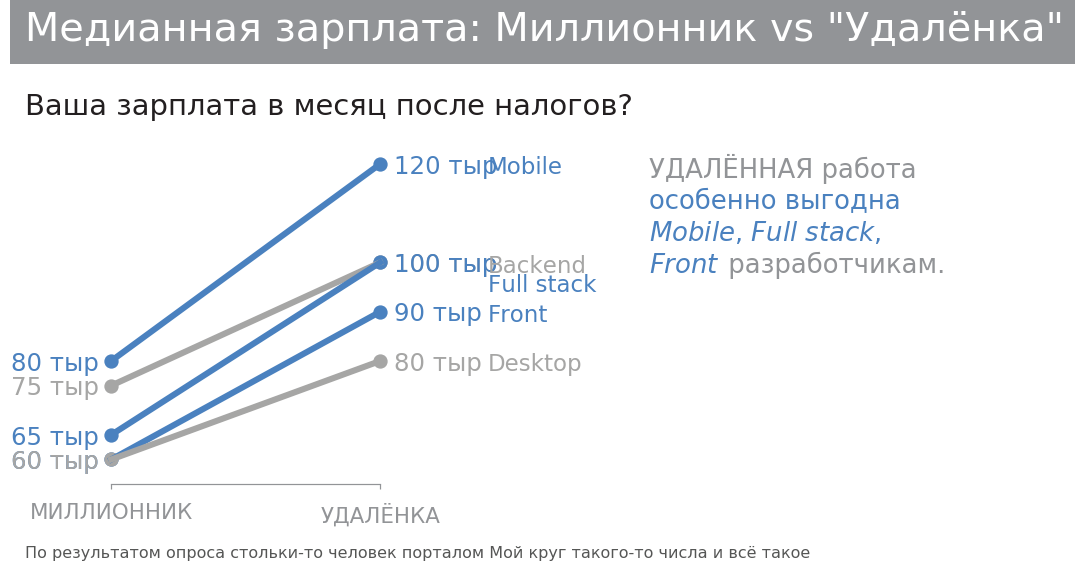

In [6]:
# create new figure
fig, ax1 = plt.subplots(figsize=(7.6, 5.5),  # width, height in inches
                        dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0.065, right=0.43, top=0.76, bottom=0.19)

# matplotlib doesn't have slopegraph drawing tool, so we use
# double axis approach
# create a twin Axes sharing the xaxis with the same limits for y-axis
ax2 = ax1.twinx()

ax2.set_ylim([55, 125])
ax1.set_ylim([55, 125])

# assign colors for responses
C = [GRAY8, BLUE2, BLUE2, GRAY8, BLUE2]
# draw slopegraph lines with circles at ends
for i in range(5):
    # draw circles
    ax1.scatter([0, 1], [Y[i], Z[i]], color=C[i], s=70)
    # draw line
    ax1.plot([0, 1], [Y[i], Z[i]], color=C[i], linewidth=4)
    # add label
    plt.text(1.4,
             Z[i] + (-2, -6)[i == 2],
             X[i],
             fontsize=15,
             linespacing=1.5,
             color=C[i])

# change the appearance of ticks, tick labels, and gridlines
# (don't show left and right ticks)
ax1.tick_params(left=False)
ax2.tick_params(right=False)

# set properties for axes object
plt.setp(ax1,
         xticks=[0, 1],  # two x-ticks only 0 and 1
         xticklabels=['МИЛЛИОННИК', 'УДАЛЁНКА'],  # with text labels
         yticks=Y,  # tick for all pre- responses %
         yticklabels=[str(v) + ' тыр' for v in Y])  # with n% labels

# set properties for secondary axes object
plt.setp(ax2,
         yticks=Z,  # tick for all post- responses %
         yticklabels=[str(v) + ' тыр' for v in Z])  # with n% labels

# remove chart border
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)

# configure both y's tick labels appearance
for ax, xshift in ((ax1, 0.15), (ax2, -0.14)):
    for i, item in enumerate(ax.get_yticklabels()):
        item.set_fontsize(16)
        item.set_color(C[i])
        # use trasformations to shift y tick labels
        # left y labels slightly right, and right labels slightly left
        offset = transforms.ScaledTranslation(xshift, 0, fig.dpi_scale_trans)
        item.set_transform(item.get_transform() + offset)

# configure x tick label appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY7)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# change x ticks color
ax1.tick_params(axis='x', colors=GRAY7)
# add bottom spine with gray color and bounds between 0 and 1
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_bounds(0, 1)
ax1.spines['bottom'].set_color(GRAY7)

# titile the plot
plt.text(-0.32, 145,
         'Медианная зарплата: Миллионник vs "Удалёнка"',
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7,  # background color
               'pad': 10,  # add more padding
               'edgecolor': 'none'})  # no border

# add survey question
plt.text(-0.32, 130, 'Ваша зарплата в месяц после налогов?', fontsize=19, 
         color=GRAY1)

# add footnote with the data source
plt.text(-0.32, 40,
         'По результатом опроса стольки-то человек порталом Мой круг '
         'такого-то числа и всё такое',
         fontsize=10.5,
         color=GRAY3)

# add after text note highlighthing some words with blue
rainbow_text(2, 98,
             'УДАЛЁННАЯ работа\n'
             'особенно выгодна\n'
             '$\\it{Mobile}$, $\\it{Full\ stack},$\n'
             '$\\it{Front}$|| разработчикам.',
             [[GRAY7], [BLUE2], [BLUE2], [BLUE2, GRAY7]],
             spacing=31.5,
             ax=ax1,
             fontsize=17);

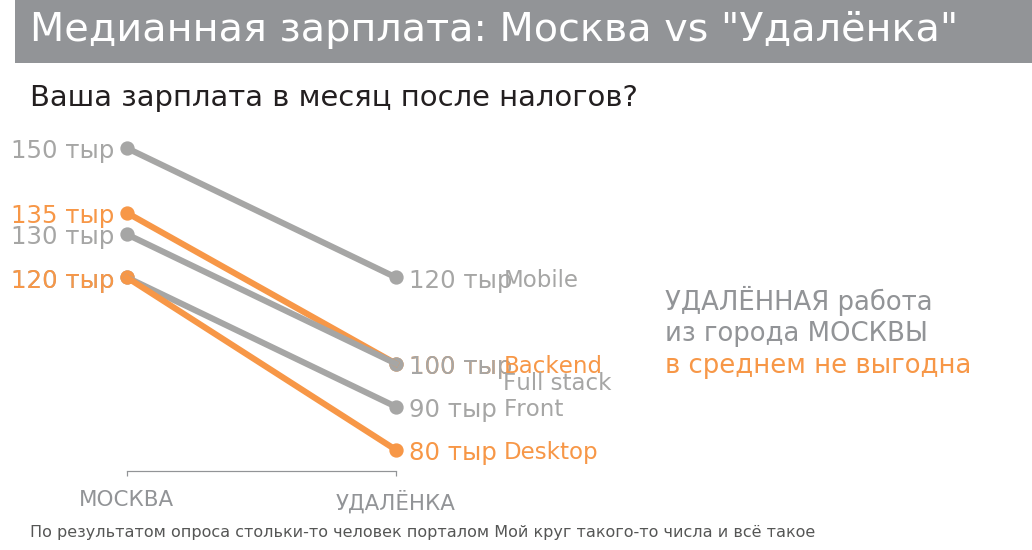

In [7]:
Y = [135, 120, 130, 120, 150]
# create new figure
fig, ax1 = plt.subplots(figsize=(7.6, 5.5),  # width, height in inches
                        dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0.065, right=0.43, top=0.76, bottom=0.19)

# matplotlib doesn't have slopegraph drawing tool, so we use
# double axis approach
# create a twin Axes sharing the xaxis with the same limits for y-axis
ax2 = ax1.twinx()

ax2.set_ylim([75, 155])
ax1.set_ylim([75, 155])

# assign colors for responses
C = [ORANGE1, GRAY8, GRAY8, ORANGE1, GRAY8]
# draw slopegraph lines with circles at ends
for i in range(5):
    # draw circles
    ax1.scatter([0, 1], [Y[i], Z[i]], color=C[i], s=70)
    # draw line
    ax1.plot([0, 1], [Y[i], Z[i]], color=C[i], linewidth=4)
    # add label
    plt.text(1.4,
             Z[i] + (-2, -6)[i == 2],
             X[i],
             fontsize=15,
             linespacing=1.5,
             color=C[i])

# change the appearance of ticks, tick labels, and gridlines
# (don't show left and right ticks)
ax1.tick_params(left=False)
ax2.tick_params(right=False)

# set properties for axes object
plt.setp(ax1,
         xticks=[0, 1],  # two x-ticks only 0 and 1
         xticklabels=['МОСКВА', 'УДАЛЁНКА'],  # with text labels
         yticks=Y,  # tick for all pre- responses %
         yticklabels=[str(v) + ' тыр' for v in Y])  # with n% labels

# set properties for secondary axes object
plt.setp(ax2,
         yticks=Z,  # tick for all post- responses %
         yticklabels=[str(v) + ' тыр' for v in Z])  # with n% labels

# remove chart border
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)

# configure both y's tick labels appearance
for ax, xshift in ((ax1, 0.15), (ax2, -0.14)):
    for i, item in enumerate(ax.get_yticklabels()):
        item.set_fontsize(16)
        item.set_color(C[i])
        # use trasformations to shift y tick labels
        # left y labels slightly right, and right labels slightly left
        offset = transforms.ScaledTranslation(xshift, 0, fig.dpi_scale_trans)
        item.set_transform(item.get_transform() + offset)

# configure x tick label appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY7)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# change x ticks color
ax1.tick_params(axis='x', colors=GRAY7)
# add bottom spine with gray color and bounds between 0 and 1
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_bounds(0, 1)
ax1.spines['bottom'].set_color(GRAY7)

# titile the plot
plt.text(-0.36, 175,
         'Медианная зарплата: Москва vs "Удалёнка"     ',
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7,  # background color
               'pad': 10,  # add more padding
               'edgecolor': 'none'})  # no border

# add survey question
plt.text(-0.36, 160, 'Ваша зарплата в месяц после налогов?', fontsize=19, 
         color=GRAY1)

# add footnote with the data source
plt.text(-0.36, 60,
         'По результатом опроса стольки-то человек порталом Мой круг '
         'такого-то числа и всё такое',
         fontsize=10.5,
         color=GRAY3)

# add after text note highlighthing some words with blue
rainbow_text(2, 98,
             'УДАЛЁННАЯ работа\n'
             'из города МОСКВЫ\n'
             'в среднем не выгодна',
             [[GRAY7], [GRAY7], [ORANGE1]],
             spacing=31.5,
             ax=ax1,
             fontsize=17);